### Formative Research Code

### Library Imports

In [206]:
import numpy as np 
import matplotlib.pyplot as plt

### Triangular Function


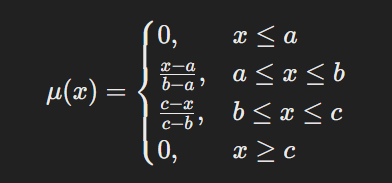

In [207]:
class TriangularMF:
    def __init__(self, name, a, b, c):
        self.name = name
        self.a = a
        self.b = b
        self.c = c

    def membership(self, x):
        x = np.array(x)
        y = np.zeros_like(x)
        
        # Evitar divisiones por cero
        b_minus_a = self.b - self.a if self.b != self.a else 1e-6
        c_minus_b = self.c - self.b if self.c != self.b else 1e-6

     # Región creciente
        y = np.where((self.a < x) & (x <= self.b), (x - self.a) / b_minus_a, y)

        # Región decreciente
        y = np.where((self.b < x) & (x < self.c), (self.c - x) / c_minus_b, y)
        
        return y
    
    def scale_membership(self, scale):
        """
        Escala la función de membresía por un factor dado.
        """
        def scaled_mf(x):
            return scale * self.membership(x)
        return scaled_mf
    
        #Todo: Completar Grafica de de funcion y funcion con la evaluacion de x



### Trapezoidal Function

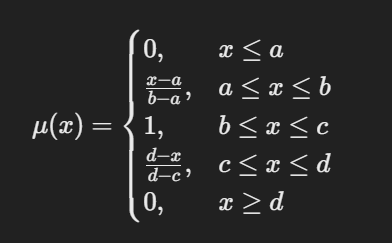

In [208]:
class TrapezoidalMF:
    def __init__(self, name, a, b, c, d):
        """
        Inicializa la función trapezoidal.
        - a, d: Límites donde la membresía es 0.
        - b, c: Límites donde la membresía es 1.
        """
        self.name = name
        self.a = a
        self.b = b
        self.c = c
        self.d = d

    def membership(self, x):
        """
        Calcula el grado de membresía para un valor o arreglo de valores.
        """
        x = np.array(x)  # Asegúrate de que x sea un arreglo de numpy
        y = np.zeros_like(x)
        
                # Evitar divisiones por cero
        b_minus_a = self.b - self.a if self.b != self.a else 1e-6
        d_minus_c = self.d - self.c if self.d != self.c else 1e-6

        # Región creciente
        y = np.where((self.a < x) & (x <= self.b), (x - self.a) /b_minus_a, y)

        # Región constante
        y = np.where((self.b < x) & (x <= self.c), 1.0, y)

        # Región decreciente
        y = np.where((self.c < x) & (x < self.d), (self.d - x) / d_minus_c, y)

        return y
    def scale_membership(self, scale):
        """
        Escala la función de membresía por un factor dado.
        """
        def scaled_mf(x):
            return scale * self.membership(x)
        return scaled_mf
    
    #Todo: Completar Grafica de de funcion y funcion con la evaluacion de x


### Gaussian Function


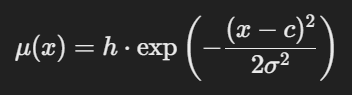

In [209]:


class GaussianMF:
    def __init__(self, name, a, b, c):
        """
        Inicializa la función gaussiana con tres parámetros.
        - name: Nombre del término (e.g., 'medium').
        - a: Altura máxima de la curva. Por defecto 1 
        #Todo No podemos pasarnos de 1 por lo tanto la altura máxima siempre va a ser 1
        - b: Centro de la curva.
        - c: Anchura de la curva (desviación estándar).
        """
        self.name = name
        self.a = a
        self.b = b
        self.c = c

    def membership(self, x):
        """
        Calcula el grado de membresía para un valor x.
        Devuelve un valor entre 0 y 'a'.
        """
        return self.a * np.exp(-((x - self.b) ** 2) / (2 * self.c ** 2))
    
    
    
    def scale_membership(self, scale):
        """
        Escala la función de membresía por un factor dado.
        """
        def scaled_mf(x):
            return scale * self.membership(x)
        return scaled_mf
    
    
    def plot(self, resolution=100):
        """
        Grafica la función triangular.
        - resolution: Número de puntos para la gráfica.
        """
        # Generar puntos en el rango [a, c]
        x = np.linspace(self.b - 3 * self.c, self.b + 3 * self.c, resolution)
        y = [self.membership(value) for value in x]

        # Crear la gráfica
        plt.figure(figsize=(8, 4))
        plt.plot(x, y, label=self.name)
        plt.title(f"Triangular Membership Function: {self.name}")
        plt.xlabel("x")
        plt.ylabel("Membership Degree")
        plt.ylim(-0.1, 1.1)  # Limitar el rango de la gráfica
        plt.axhline(0, color='black', linewidth=0.5, linestyle="--")
        plt.axvline(0, color='black', linewidth=0.5, linestyle="--")
        plt.grid()
        plt.legend()
        plt.show()

    def plot_with_membership(self, x_value, resolution=100):
        """
        Grafica la función gaussiana y resalta el grado de membresía para un valor específico.
        - x_value: Valor crisp para calcular y graficar el grado de pertenencia.
        - resolution: Número de puntos para la gráfica.
        """
        # Generar puntos en el rango [b - 3*c, b + 3*c]
        x = np.linspace(self.b - 3 * self.c, self.b + 3 * self.c, resolution)
        y = [self.membership(value) for value in x]

        # Calcular el grado de membresía para el valor dado
        y_value = self.membership(x_value) #Todo Aqui se ejecuta el calculo

        # Crear la gráfica
        plt.figure(figsize=(8, 4))
        plt.plot(x, y, label=self.name, color='blue')  # Función gaussiana
        plt.scatter([x_value], [y_value], color='red', zorder=5, label=f"({x_value}, {y_value:.2f})")  # Punto
        plt.vlines(x_value, 0, y_value, color='red', linestyle='--', label="Grado de pertenencia")  # Línea vertical

        # Etiquetas y configuración
        plt.title(f"Gaussian Membership Function: {self.name}")
        plt.xlabel("x")
        plt.ylabel("Membership Degree")
        plt.ylim(-0.1, self.a + 0.1)  # Limitar el rango de la gráfica
        plt.axhline(0, color='black', linewidth=0.5, linestyle="--")
        plt.axvline(0, color='black', linewidth=0.5, linestyle="--")
        plt.grid()
        plt.legend()
        plt.show()


Test Gaussian Function 

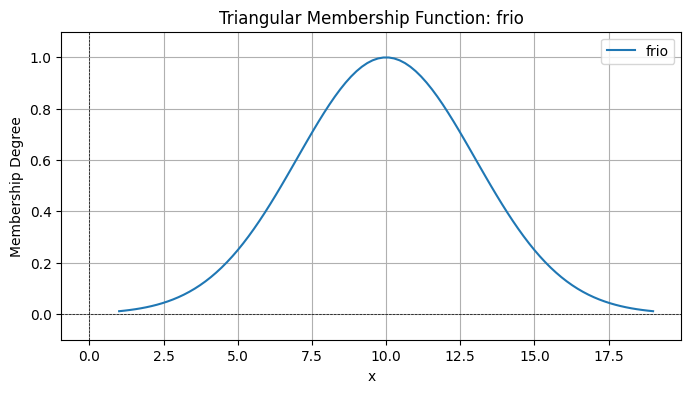

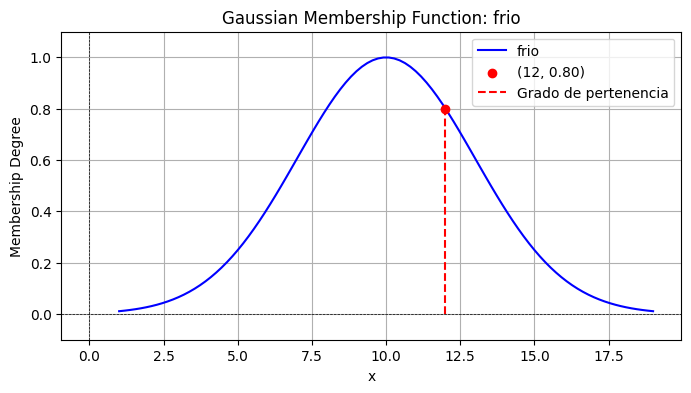

In [210]:
example=GaussianMF('frio',1,10,3)

example.plot()

example.plot_with_membership(12)

### Fuzzy Variable Class

In [211]:

class FuzzyVariable:
    """
    Clase que representa una variable difusa con un conjunto de términos lingüísticos.
    """
    def __init__(self, name, range_):
        self.name = name  # Nombre de la variable (e.g., 'Temperature')
        self.range = range_  # Rango de valores de la variable
        self.terms = {}  # Diccionario para almacenar términos lingüísticos

    def add_term(self, term):
        """Agrega un término lingüístico a la variable difusa."""
        self.terms[term.name] = term

    def fuzzify(self, value):
        """Calcula los grados de membresía para un valor específico."""
        return {name: term.membership(value) for name, term in self.terms.items()}

### Fuzzy Inference System Mamdani

In [212]:


class FuzzySystem:
    """
    Clase que representa el sistema de inferencia difusa.
    """
    def __init__(self):
        self.variables = {}
        self.rules = []
        self.output_range = None

    def add_variable(self, variable):
        """Agrega una variable difusa al sistema."""
        self.variables[variable.name] = variable

    def add_rule(self, rule):
        """Agrega una regla al sistema difuso."""
        self.rules.append(rule)

    def fuzzify(self, inputs):
        """Fuzzifica las entradas crisp del sistema."""
        return {var: self.variables[var].fuzzify(val) for var, val in inputs.items()}

    def evaluate_rules(self, fuzzified_inputs):
        """Evalúa todas las reglas con base en las entradas fuzzificadas."""
        rule_results = []
        for rule in self.rules:
            conditions = rule['if']
            output = rule['then']

            # Calcula la fuerza de activación (AND = min)
            activation = min(fuzzified_inputs[var][term] for var, term in conditions.items())
            rule_results.append((activation, output))
            print('Active Rules: ')
            print(rule_results[-1])
        return rule_results

    def aggregate(self, rule_results):
        """Agrega las salidas difusas resultantes de todas las reglas."""
        output_range = self.output_range
        aggregated = np.zeros_like(output_range)

        for activation, (output_var, output_term) in rule_results:
            mf = self.variables[output_var].terms[output_term].membership
            aggregated = np.maximum(aggregated, np.minimum(activation, mf(output_range)))

        return aggregated

    def defuzzify(self, aggregated):
        """Convierte el conjunto difuso agregado en un valor crisp mediante el centroide."""
        numerator = np.sum(aggregated * self.output_range)
        denominator = np.sum(aggregated)
        return numerator / denominator if denominator != 0 else 0

    def simulate(self, inputs):
        """Simula el sistema difuso dado un conjunto de entradas crisp."""
        fuzzified_inputs = self.fuzzify(inputs)
        rule_results = self.evaluate_rules(fuzzified_inputs)
        aggregated = self.aggregate(rule_results)
        return self.defuzzify(aggregated)

### Test Mamdani FIS

Generate Fuzzy Inference System Object

In [213]:
# Creación del sistema difuso
fis = FuzzySystem()


Add Fuzzy Variables

In [214]:
# Definición de variables difusas
temperature = FuzzyVariable('Temperature', np.linspace(0, 50, 100))
temperature.add_term(TrapezoidalMF('Cold', -10, 0, 10, 25))
temperature.add_term(TriangularMF('Warm', 15,30,40))
temperature.add_term(TrapezoidalMF('Hot', 33, 40, 50, 60))

humidity = FuzzyVariable('Humidity', np.linspace(0, 100, 100))
humidity.add_term(TriangularMF('Dry', 0, 0, 50))
humidity.add_term(TriangularMF('Normal', 30, 50, 70))
humidity.add_term(TriangularMF('Wet', 50, 100, 100))

fan_speed = FuzzyVariable('Fan Speed', np.linspace(0, 100, 100))
fan_speed.add_term(GaussianMF('Low', 1, 10, 20))
fan_speed.add_term(GaussianMF('Medium', 1, 40, 15))
fan_speed.add_term(GaussianMF('High', 1, 80, 10))

fis.add_variable(temperature)
fis.add_variable(humidity)
fis.add_variable(fan_speed)

fis.output_range = fan_speed.range


Add Rules

Plots

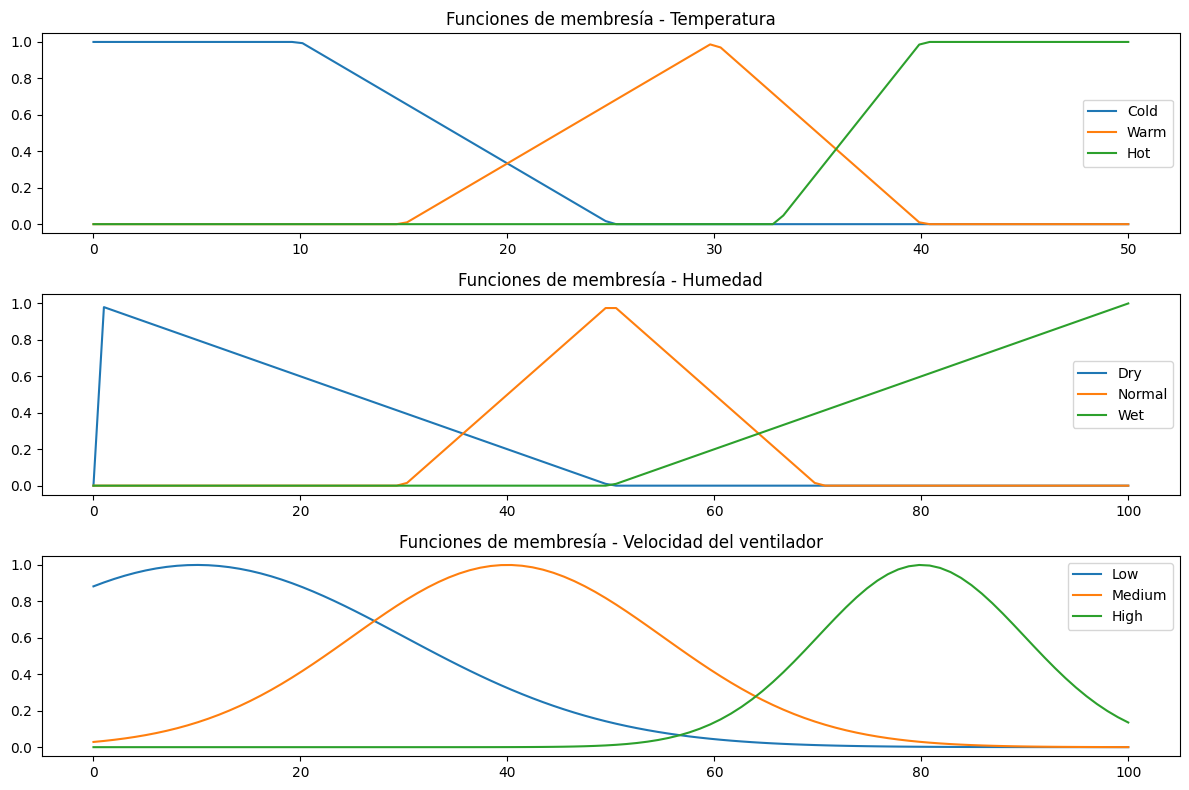

In [215]:
# Visualización de funciones de membresía
plt.figure(figsize=(12, 8))
plt.subplot(3, 1, 1)
plt.title('Funciones de membresía - Temperatura')
for term_name, term in temperature.terms.items():
    plt.plot(temperature.range, term.membership(temperature.range), label=term_name)
plt.legend()

plt.subplot(3, 1, 2)
plt.title('Funciones de membresía - Humedad')
for term_name, term in humidity.terms.items():
    plt.plot(humidity.range, term.membership(humidity.range), label=term_name)
plt.legend()

plt.subplot(3, 1, 3)
plt.title('Funciones de membresía - Velocidad del ventilador')
for term_name, term in fan_speed.terms.items():
    plt.plot(fan_speed.range, term.membership(fan_speed.range), label=term_name)
plt.legend()

plt.tight_layout()
plt.show()

# Sistema de Inferencia Difusa Mamdani

Este cuaderno implementa un sistema de inferencia difusa basado en el modelo Mamdani. Las principales características son:

1. **Fuzzificación**: Conversión de valores crisp (precisos) en valores difusos mediante funciones de membresía.
2. **Evaluación de Reglas**: Uso de reglas "SI-ENTONCES" para modelar la relación entre las variables de entrada y salida.
3. **Agregación**: Combinación de los resultados de las reglas activadas.
4. **Defuzzificación**: Conversión del conjunto difuso agregado en un valor crisp de salida.

## Variables Difusas
- **Temperatura**: Cold, Warm, Hot.
- **Humedad**: Dry, Normal, Wet.
- **Velocidad del Ventilador**: Low, Medium, High.

## Ejemplo Funcional
Se agregaron reglas específicas para probar el sistema con entradas funcionales. Por ejemplo:

1. Si **Temperatura** es `Cold` y **Humedad** es `Dry`, entonces **Velocidad del Ventilador** es `Low`.
2. Si **Temperatura** es `Warm` y **Humedad** es `Normal`, entonces **Velocidad del Ventilador** es `Medium`.
3. Si **Temperatura** es `Hot` y **Humedad** es `Wet`, entonces **Velocidad del Ventilador** es `High`.

Con estas reglas, las entradas `Temperature=20` y `Humidity=40` activarán una salida intermedia.
"""

### Simulation

In [216]:
# Agregar reglas manualmente (Ejemplo funcional)
fis.add_rule({'if': {'Temperature': 'Cold', 'Humidity': 'Dry'}, 'then': ('Fan Speed', 'Low')})
fis.add_rule({'if': {'Temperature': 'Warm', 'Humidity': 'Normal'}, 'then': ('Fan Speed', 'Medium')})
fis.add_rule({'if': {'Temperature': 'Hot', 'Humidity': 'Wet'}, 'then': ('Fan Speed', 'High')})


fis.add_rule({'if': {'Temperature': 'Cold', 'Humidity': 'Dry'}, 'then': ('Fan Speed', 'Low')})
fis.add_rule({'if': {'Temperature': 'Cold', 'Humidity': 'Wet'}, 'then': ('Fan Speed', 'Medium')})
fis.add_rule({'if': {'Temperature': 'Warm', 'Humidity': 'Dry'}, 'then': ('Fan Speed', 'Medium')})

In [217]:
# Simulación con entradas funcionales
inputs = {'Temperature': 20, 'Humidity': 40}  # Caso de prueba funcional
output = fis.simulate(inputs)
print(f"Salida crisp (Fan Speed): {output}")

Active Rules: 
(array(0.2), ('Fan Speed', 'Low'))
Active Rules: 
(array(0.33333333), ('Fan Speed', 'Medium'))
Active Rules: 
(array(0.), ('Fan Speed', 'High'))
Active Rules: 
(array(0.2), ('Fan Speed', 'Low'))
Active Rules: 
(array(0.), ('Fan Speed', 'Medium'))
Active Rules: 
(array(0.2), ('Fan Speed', 'Medium'))
Salida crisp (Fan Speed): 37.81645127192967


In [218]:
inputs = {'Temperature': 30, 'Humidity': 60}  # Caso de prueba funcional
output = fis.simulate(inputs)
print(f"Salida crisp (Fan Speed): {output}")

Active Rules: 
(array(0.), ('Fan Speed', 'Low'))
Active Rules: 
(array(0.5), ('Fan Speed', 'Medium'))
Active Rules: 
(array(0.), ('Fan Speed', 'High'))
Active Rules: 
(array(0.), ('Fan Speed', 'Low'))
Active Rules: 
(array(0.), ('Fan Speed', 'Medium'))
Active Rules: 
(array(0.), ('Fan Speed', 'Medium'))
Salida crisp (Fan Speed): 40.218970163612305


In [219]:
inputs = {'Temperature': 25, 'Humidity': 45}  # Caso de prueba funcional
output = fis.simulate(inputs)
print(f"Salida crisp (Fan Speed): {output}")

Active Rules: 
(array(0.), ('Fan Speed', 'Low'))
Active Rules: 
(array(0.66666667), ('Fan Speed', 'Medium'))
Active Rules: 
(array(0.), ('Fan Speed', 'High'))
Active Rules: 
(array(0.), ('Fan Speed', 'Low'))
Active Rules: 
(array(0.), ('Fan Speed', 'Medium'))
Active Rules: 
(array(0.1), ('Fan Speed', 'Medium'))
Salida crisp (Fan Speed): 40.184148161388585


In [220]:
inputs = {'Temperature': 45, 'Humidity': 90}  # Caso de prueba funcional
output = fis.simulate(inputs)
print(f"Salida crisp (Fan Speed): {output}")

Active Rules: 
(array(0.), ('Fan Speed', 'Low'))
Active Rules: 
(array(0.), ('Fan Speed', 'Medium'))
Active Rules: 
(array(0.8), ('Fan Speed', 'High'))
Active Rules: 
(array(0.), ('Fan Speed', 'Low'))
Active Rules: 
(array(0.), ('Fan Speed', 'Medium'))
Active Rules: 
(array(0.), ('Fan Speed', 'Medium'))
Salida crisp (Fan Speed): 79.46610619180801


In [221]:
inputs = {'Temperature': 10, 'Humidity': 90}  # Caso de prueba funcional
output = fis.simulate(inputs)
print(f"Salida crisp (Fan Speed): {output}")

Active Rules: 
(array(0.), ('Fan Speed', 'Low'))
Active Rules: 
(array(0.), ('Fan Speed', 'Medium'))
Active Rules: 
(array(0.), ('Fan Speed', 'High'))
Active Rules: 
(array(0.), ('Fan Speed', 'Low'))
Active Rules: 
(array(0.8), ('Fan Speed', 'Medium'))
Active Rules: 
(array(0.), ('Fan Speed', 'Medium'))
Salida crisp (Fan Speed): 40.166242564792206


In [222]:
inputs = {'Temperature': 50, 'Humidity': 70}  # Caso de prueba funcional
output = fis.simulate(inputs)
print(f"Salida crisp (Fan Speed): {output}")

Active Rules: 
(array(0.), ('Fan Speed', 'Low'))
Active Rules: 
(array(0.), ('Fan Speed', 'Medium'))
Active Rules: 
(array(0.4), ('Fan Speed', 'High'))
Active Rules: 
(array(0.), ('Fan Speed', 'Low'))
Active Rules: 
(array(0.), ('Fan Speed', 'Medium'))
Active Rules: 
(array(0.), ('Fan Speed', 'Medium'))
Salida crisp (Fan Speed): 79.16980374454162


In [223]:
inputs = {'Temperature': 39, 'Humidity': 60}  # Caso de prueba funcional
output = fis.simulate(inputs)
print(f"Salida crisp (Fan Speed): {output}")

Active Rules: 
(array(0.), ('Fan Speed', 'Low'))
Active Rules: 
(array(0.1), ('Fan Speed', 'Medium'))
Active Rules: 
(array(0.2), ('Fan Speed', 'High'))
Active Rules: 
(array(0.), ('Fan Speed', 'Low'))
Active Rules: 
(array(0.), ('Fan Speed', 'Medium'))
Active Rules: 
(array(0.), ('Fan Speed', 'Medium'))
Salida crisp (Fan Speed): 59.834811062242245
